In [1]:
from IPython.display import display, HTML

# The big dataset of ultra-marathon running
# Link of data : 
[big-dataset-of-ultra-marathon-running](https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/discussion/420633)
# Overview :
# The dataset contains information on ultra-marathon races and includes the following columns:

*Year of Event ,
*Event Date ,
*Event Name ,
*Event Distance ,
*Event Number ,
*Athlete Performance ,
*Athlete Club ,
*Athlete Country ,
*Athlete Year of Birth , 
*Athlete Gender ,
*Athlete Age Category ,
*Athlete Average Speed ,
*Athlete ID

This comprehensive dataset consists of over 7 million race records, covering events registered between 1798 and 2022.

We will perform an in-depth analysis on this data to gain insights into ultra-marathon running trends and patterns over time.

# <span style='color:green'>Import libraries</span>

In [2]:
import pandas as pd 
import matplotlib.pyplot  as plt 
import seaborn as sns
from datetime import datetime
import numpy as np

# <span style='color:green'>Read the data</span>

In [3]:
data=pd.read_csv('E:\\DEPI\\python_project\\data\\TWO_CENTURIES_OF_UM_RACES.csv')

C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\4020898212.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('E:\\DEPI\\python_project\\data\\TWO_CENTURIES_OF_UM_RACES.csv')


In [4]:
data.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [5]:
data.shape # 7 million recoredes

(7461195, 13)

In [6]:
data.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

# <span style='color:green'>Data cleaning</span>

# <span style='color:darkolivegreen'>Only want USA races 50Km or 50Mi within 2020 </span>

In [7]:
df = data[((data['Event distance/length'] == '50km') | (data['Event distance/length'] == '50mi')) & (data['Year of event'] == 2020)]
df

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2538571,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:34:19 h,日本隊,JPN,1965.0,M,M50,10.627,53107
2538572,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:43:50 h,NaN,AUS,1974.0,M,M45,10.409,8785
2538573,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:04:40 h,NaN,TPE,1976.0,M,M40,9.962,4502
2538574,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:30:49 h,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,9.452,63964
2538575,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:34:47 h,NaN,TPE,1964.0,M,M55,9.379,4485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762404,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:25 h,AKS Polonia Warszawa,POL,1981.0,F,W35,6.573,860743
2762405,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:27 h,*Warszawa,POL,1970.0,F,W45,6.572,860744
2762406,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:44:18 h,Outdoor Training,POL,1993.0,F,W23,6.461,860745
2762407,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,8:04:50 h,PH Bysewo Gdańsk,POL,1976.0,M,M40,6.188,798409


In [8]:
my_data=df[df['Event name'].str.contains('USA', case=False)] 
#case-insensitive
my_data

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349


In [9]:
my_data.isna().sum()

Year of event                   0
Event dates                     0
Event name                      0
Event distance/length           0
Event number of finishers       0
Athlete performance             0
Athlete club                 3171
Athlete country                 0
Athlete year of birth         261
Athlete gender                  0
Athlete age category          244
Athlete average speed           0
Athlete ID                      0
dtype: int64

In [10]:
my_data.duplicated()

2539945    False
2539946    False
2539947    False
2539948    False
2539949    False
           ...  
2760957    False
2760958    False
2760959    False
2760960    False
2760961    False
Length: 26565, dtype: bool

In [11]:
my_data.drop(columns=['Athlete club'], inplace=True)

C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\4182763893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data.drop(columns=['Athlete club'], inplace=True)


In [12]:
null_age_category = my_data[my_data['Athlete age category'].isnull()]
null_age_category

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km (USA),50km,57,6:10:30 h,USA,NaN,M,NaN,8.097,811923
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K (USA),50km,54,4:46:34 h,USA,NaN,M,NaN,10.469,812656
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K (USA),50km,54,5:08:36 h,USA,NaN,M,NaN,9.721,812657
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K (USA),50km,54,5:54:04 h,USA,NaN,F,NaN,8.473,658221
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K (USA),50km,54,6:07:11 h,USA,NaN,M,NaN,8.17,812660
...,...,...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km (USA),50km,8,8:31:26 h,USA,NaN,F,NaN,5.866,857251
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race (USA),50mi,27,11:55:05 h,USA,NaN,M,NaN,6.752,857957
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race (USA),50mi,23,9:03:25 h,USA,NaN,M,NaN,8.885,859462
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race (USA),50mi,23,10:37:00 h,USA,NaN,M,NaN,7.579,398583


In [13]:
missing_both = my_data[my_data['Athlete year of birth'].isnull() & my_data['Athlete age category'].isnull()]
print(missing_both.shape)

(244, 12)


In [14]:
# Define a function to impute year of birth based on age category
def estimate_year_of_birth(row):
    if pd.isnull(row['Athlete year of birth']) and not pd.isnull(row['Athlete age category']):
        event_year = 2020  
        
        # Define age categories and corresponding midpoints for estimation
        if row['Athlete age category'] == 'M15'or'W15':
            return event_year - 15  # Midpoint age 15
        elif row['Athlete age category'] == 'M25'or'W25':
            return event_year - 25  # Midpoint age 25
        elif row['Athlete age category'] == 'M35'or'W35':
            return event_year - 35  # Midpoint age 35
        elif row['Athlete age category'] == 'M45'or'W45':
            return event_year - 45  # Midpoint age 45
        elif row['Athlete age category'] == 'M55'or'W55':
            return event_year - 55  # Midpoint age 55
        elif row['Athlete age category'] == 'M65'or'W65':
            return event_year - 65  # Midpoint age 65
        elif row['Athlete age category'] == 'M75'or'W75':
            return event_year - 75  # Midpoint age 75
    return row['Athlete year of birth']

# Apply the function to estimate year of birth where age category is available
my_data['Athlete year of birth'] = my_data.apply(estimate_year_of_birth, axis=1)

C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\2673639778.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Athlete year of birth'] = my_data.apply(estimate_year_of_birth, axis=1)


In [15]:
my_data.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete country                0
Athlete year of birth        244
Athlete gender                 0
Athlete age category         244
Athlete average speed          0
Athlete ID                     0
dtype: int64

In [16]:
# Impute missing 'Athlete year of birth' with the median value
median_year_of_birth = my_data['Athlete year of birth'].median()
my_data['Athlete year of birth'].fillna(median_year_of_birth, inplace=True)

C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\3306171097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Athlete year of birth'].fillna(median_year_of_birth, inplace=True)


In [17]:
my_data.drop(columns=['Athlete age category'], inplace=True)

C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\2578844229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data.drop(columns=['Athlete age category'], inplace=True)


In [18]:
my_data.isna().sum()

Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete country              0
Athlete year of birth        0
Athlete gender               0
Athlete average speed        0
Athlete ID                   0
dtype: int64

In [19]:
my_data['Athlete year of birth']=my_data['Athlete year of birth'].astype(int)

C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\3035907731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Athlete year of birth']=my_data['Athlete year of birth'].astype(int)


In [20]:
my_data['Athlete average speed']=my_data['Athlete average speed'].astype(float)

C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\830047333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Athlete average speed']=my_data['Athlete average speed'].astype(float)


In [21]:
my_data['Athlete performance']=my_data['Athlete performance'].str.split(' ').str.get(0)

C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\2876064551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Athlete performance']=my_data['Athlete performance'].str.split(' ').str.get(0)


In [22]:
my_data['Athlete performance'] = pd.to_timedelta(my_data['Athlete performance'])

C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\1396654941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Athlete performance'] = pd.to_timedelta(my_data['Athlete performance'])


In [23]:
my_data['Athlete age']=2020-my_data['Athlete year of birth']

C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\921742118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Athlete age']=2020-my_data['Athlete year of birth']


In [24]:
my_data.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Athlete age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 03:17:55,USA,1991,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 04:02:32,USA,1981,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 04:07:57,USA,1999,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 04:22:02,USA,1983,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 04:27:34,USA,1977,M,11.212,810281,43


# <span style='color:green'>Format the date</span>
Problem => 18.-19.01.2020 / 20.-21.01.2020

In [25]:
def parse_date_range(date_str):
    if '-' in date_str:
        # Extract the start day, end day, month, and year
        day_range, rest = date_str.split('-')
        start_day = day_range.split('.')[0]
        end_day, month, year = rest.split('.')
        
        # Create datetime objects for the start and end dates
        start_date = datetime.strptime(f"{start_day}.{month}.{year}", '%d.%m.%Y')
        end_date = datetime.strptime(f"{end_day}.{month}.{year}", '%d.%m.%Y')
        
        return start_date, end_date
    else:
        # Handle single date case (no range)
        date = datetime.strptime(date_str, '%d.%m.%Y')
        return date, date
    
my_data[['Start date', 'End date']] = my_data['Event dates'].apply(lambda x: pd.Series(parse_date_range(x)))

C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\2600915009.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data[['Start date', 'End date']] = my_data['Event dates'].apply(lambda x: pd.Series(parse_date_range(x)))
C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\2600915009.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data[['Start date', 'End date']] = my_data['Event dates'].apply(lambda x: pd.Series(parse_date_range(x)))


In [26]:
filtered_row = my_data[my_data['Event dates'] == '18.-19.01.2020']
filtered_row

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Athlete age,Start date,End date
2555890,2020,18.-19.01.2020,Celtic Winter Classic 50 Miles Run (USA),50mi,6,0 days 09:46:07,USA,1979,M,8.237,340732,41,2020-01-18,2020-01-19
2555891,2020,18.-19.01.2020,Celtic Winter Classic 50 Miles Run (USA),50mi,6,0 days 11:23:44,USA,1962,M,7.061,27881,58,2020-01-18,2020-01-19
2555892,2020,18.-19.01.2020,Celtic Winter Classic 50 Miles Run (USA),50mi,6,0 days 13:17:13,USA,1985,F,6.056,788998,35,2020-01-18,2020-01-19
2555893,2020,18.-19.01.2020,Celtic Winter Classic 50 Miles Run (USA),50mi,6,0 days 14:49:58,USA,1958,M,5.425,13466,62,2020-01-18,2020-01-19
2555894,2020,18.-19.01.2020,Celtic Winter Classic 50 Miles Run (USA),50mi,6,0 days 14:53:09,USA,1978,M,5.406,813531,42,2020-01-18,2020-01-19
2555895,2020,18.-19.01.2020,Celtic Winter Classic 50 Miles Run (USA),50mi,6,0 days 17:13:31,USA,1969,M,4.671,681080,51,2020-01-18,2020-01-19
2557337,2020,18.-19.01.2020,Celtic Winter Classic 50 Km Run (USA),50km,10,0 days 03:50:14,USA,1988,M,13.030,813793,32,2020-01-18,2020-01-19
2557338,2020,18.-19.01.2020,Celtic Winter Classic 50 Km Run (USA),50km,10,0 days 04:18:28,USA,1990,M,11.607,258232,30,2020-01-18,2020-01-19
2557339,2020,18.-19.01.2020,Celtic Winter Classic 50 Km Run (USA),50km,10,0 days 06:24:40,USA,1958,M,7.799,55626,62,2020-01-18,2020-01-19
2557340,2020,18.-19.01.2020,Celtic Winter Classic 50 Km Run (USA),50km,10,0 days 07:29:34,USA,1982,M,6.673,46025,38,2020-01-18,2020-01-19


In [27]:
my_data['Start date'] = my_data['Start date'].dt.strftime('%m/%d/%Y')
my_data['End date'] = my_data['End date'].dt.strftime('%m/%d/%Y')
my_data

C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\9660905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Start date'] = my_data['Start date'].dt.strftime('%m/%d/%Y')
C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\9660905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['End date'] = my_data['End date'].dt.strftime('%m/%d/%Y')


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Athlete age,Start date,End date
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 03:17:55,USA,1991,M,15.158,71287,29,02/02/2020,02/02/2020
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 04:02:32,USA,1981,M,12.369,629508,39,02/02/2020,02/02/2020
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 04:07:57,USA,1999,M,12.099,64838,21,02/02/2020,02/02/2020
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 04:22:02,USA,1983,M,11.449,704450,37,02/02/2020,02/02/2020
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 04:27:34,USA,1977,M,11.212,810281,43,02/02/2020,02/02/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,0 days 07:07:48,USA,1958,F,7.013,816361,62,10/03/2020,10/03/2020
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,0 days 07:27:22,USA,1977,F,6.706,326469,43,10/03/2020,10/03/2020
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,0 days 07:27:24,USA,1962,F,6.705,372174,58,10/03/2020,10/03/2020
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,0 days 07:38:30,USA,1981,F,6.543,860349,39,10/03/2020,10/03/2020


In [28]:
my_data[my_data['Event dates'] == '18.-19.01.2020']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Athlete age,Start date,End date
2555890,2020,18.-19.01.2020,Celtic Winter Classic 50 Miles Run (USA),50mi,6,0 days 09:46:07,USA,1979,M,8.237,340732,41,01/18/2020,01/19/2020
2555891,2020,18.-19.01.2020,Celtic Winter Classic 50 Miles Run (USA),50mi,6,0 days 11:23:44,USA,1962,M,7.061,27881,58,01/18/2020,01/19/2020
2555892,2020,18.-19.01.2020,Celtic Winter Classic 50 Miles Run (USA),50mi,6,0 days 13:17:13,USA,1985,F,6.056,788998,35,01/18/2020,01/19/2020
2555893,2020,18.-19.01.2020,Celtic Winter Classic 50 Miles Run (USA),50mi,6,0 days 14:49:58,USA,1958,M,5.425,13466,62,01/18/2020,01/19/2020
2555894,2020,18.-19.01.2020,Celtic Winter Classic 50 Miles Run (USA),50mi,6,0 days 14:53:09,USA,1978,M,5.406,813531,42,01/18/2020,01/19/2020
2555895,2020,18.-19.01.2020,Celtic Winter Classic 50 Miles Run (USA),50mi,6,0 days 17:13:31,USA,1969,M,4.671,681080,51,01/18/2020,01/19/2020
2557337,2020,18.-19.01.2020,Celtic Winter Classic 50 Km Run (USA),50km,10,0 days 03:50:14,USA,1988,M,13.030,813793,32,01/18/2020,01/19/2020
2557338,2020,18.-19.01.2020,Celtic Winter Classic 50 Km Run (USA),50km,10,0 days 04:18:28,USA,1990,M,11.607,258232,30,01/18/2020,01/19/2020
2557339,2020,18.-19.01.2020,Celtic Winter Classic 50 Km Run (USA),50km,10,0 days 06:24:40,USA,1958,M,7.799,55626,62,01/18/2020,01/19/2020
2557340,2020,18.-19.01.2020,Celtic Winter Classic 50 Km Run (USA),50km,10,0 days 07:29:34,USA,1982,M,6.673,46025,38,01/18/2020,01/19/2020


In [29]:
my_data.drop(columns=['Event dates','Year of event'], inplace=True)

C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\4031989966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data.drop(columns=['Event dates','Year of event'], inplace=True)


In [30]:
my_data.head(3)

,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Athlete age,Start date,End date
2539945,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 03:17:55,USA,1991,M,15.158,71287,29,02/02/2020,02/02/2020
2539946,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 04:02:32,USA,1981,M,12.369,629508,39,02/02/2020,02/02/2020
2539947,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 04:07:57,USA,1999,M,12.099,64838,21,02/02/2020,02/02/2020


# <span style='color:green'>Exploratory Data Analysis</span>

In [31]:
my_data.describe()

,Event number of finishers,Athlete performance,Athlete year of birth,Athlete average speed,Athlete ID,Athlete age
count,26565.000000,26565,26565.000000,26565.000000,26565.000000,26565.000000
mean,122.059665,0 days 08:02:00.091737248,1978.150612,7.440730,455911.991831,41.849388
std,130.229593,0 days 02:44:07.651910872,10.687852,1.709126,329102.847096,10.687852
min,1.000000,0 days 02:49:03,1935.000000,1.541000,55.000000,9.000000
25%,44.000000,0 days 06:09:18,1971.000000,6.258000,102790.000000,34.000000
50%,79.000000,0 days 07:21:13,1979.000000,7.225000,412187.000000,41.000000
75%,156.000000,0 days 09:14:04,1986.000000,8.402000,815823.000000,49.000000
max,636.000000,1 days 13:04:55,2011.000000,17.746000,860349.000000,85.000000


# <span style='color:darkolivegreen'>1.What is the distribution of the ages ? </span>

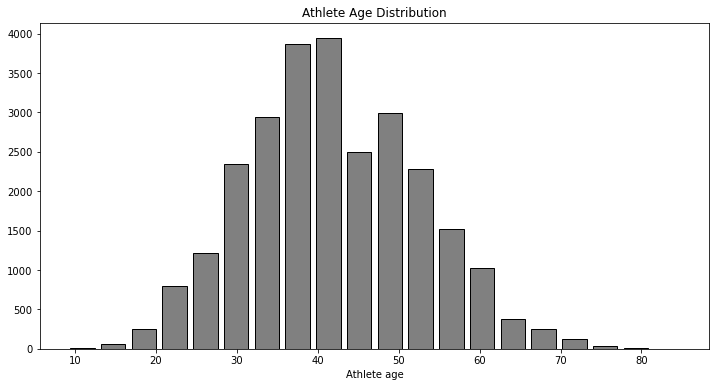

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6)) 
plt.hist(my_data['Athlete age'], bins=20, rwidth=0.8, color='grey' , edgecolor='black')
plt.xlabel('Athlete age')
plt.title('Athlete Age Distribution')
plt.show()

# We found that the majority of participants were between the ages of 35 and 45

In [33]:
most_frequent_year = my_data['Athlete year of birth'].value_counts().idxmax()
most_frequent_count = my_data['Athlete year of birth'].value_counts().max()
print(f"The most frequent year of birth is {most_frequent_year} with {most_frequent_count} occurrences.")

The most frequent year of birth is 1979 with 1118 occurrences.


# <span style='color:darkolivegreen'>2.What is the distribution of athlete age by gender ? </span>

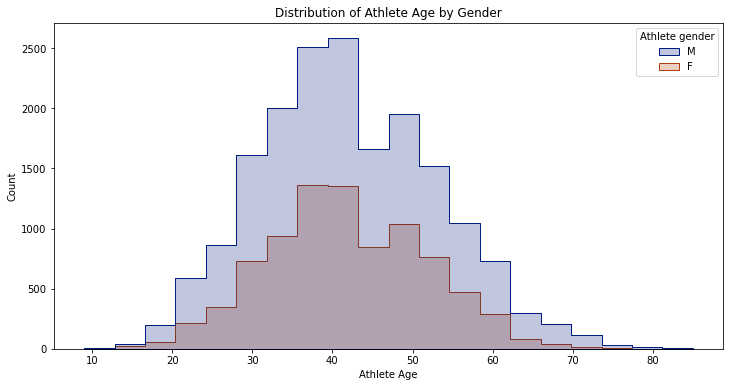

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(data=my_data, x='Athlete age', hue='Athlete gender', bins=20, palette='dark', element='step')
plt.xlabel('Athlete Age')
plt.title('Distribution of Athlete Age by Gender')
plt.show()

# <span style='color:darkolivegreen'>3.Differnece in speed for the 50km 50 mi male to female </span>

In [35]:
my_data.groupby(['Event distance/length','Athlete gender'])['Athlete average speed'].mean()

Event distance/length  Athlete gender
50km                   F                 7.093889
                       M                 7.743568
50mi                   F                 6.825774
                       M                 7.246140
Name: Athlete average speed, dtype: float64

# <span style='color:darkolivegreen'>4.Who is the best athlete? </span>

In [36]:
best_athlete_performance = my_data.loc[my_data['Athlete performance'].idxmin()]
print(best_athlete_performance[['Athlete ID', 'Athlete performance']])

Athlete ID                      117534
Athlete performance    0 days 02:49:03
Name: 2628377, dtype: object


What is his information?

In [37]:
best_athlete=my_data[my_data['Athlete ID']==117534]
best_athlete

,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Athlete age,Start date,End date
2628377,Pemberton Trail 50 km (USA),50km,67,0 days 02:49:03,USA,1990,M,17.746,117534,30,02/08/2020,02/08/2020


# <span style='color:darkolivegreen'>5.Does the weather affect? </span>

Spring => 3-5
Summer => 6-8
Fall => 9-11
Winter => 12-2

In [38]:
my_data['Month'] = my_data['Start date'].str.slice(0, 2).astype(int)

C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\1511663236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Month'] = my_data['Start date'].str.slice(0, 2).astype(int)


In [39]:
my_data['Season'] = my_data['Month'].apply(
    lambda x: 'Summer' if 6 <= x <= 8 else
              'Spring' if 3 <= x <= 5 else
              'Fall' if 9 <= x <= 11 else
              'Winter'
)

C:\Users\Farah\AppData\Local\Temp\ipykernel_23352\4110980970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Season'] = my_data['Month'].apply(


In [40]:
my_data

,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Athlete age,Start date,End date,Month,Season
2539945,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 03:17:55,USA,1991,M,15.158,71287,29,02/02/2020,02/02/2020,2,Winter
2539946,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 04:02:32,USA,1981,M,12.369,629508,39,02/02/2020,02/02/2020,2,Winter
2539947,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 04:07:57,USA,1999,M,12.099,64838,21,02/02/2020,02/02/2020,2,Winter
2539948,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 04:22:02,USA,1983,M,11.449,704450,37,02/02/2020,02/02/2020,2,Winter
2539949,West Seattle Beach Run - Winter Edition (USA),50km,20,0 days 04:27:34,USA,1977,M,11.212,810281,43,02/02/2020,02/02/2020,2,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,Yankee Springs Fall Trail Run Festival (USA),50km,30,0 days 07:07:48,USA,1958,F,7.013,816361,62,10/03/2020,10/03/2020,10,Fall
2760958,Yankee Springs Fall Trail Run Festival (USA),50km,30,0 days 07:27:22,USA,1977,F,6.706,326469,43,10/03/2020,10/03/2020,10,Fall
2760959,Yankee Springs Fall Trail Run Festival (USA),50km,30,0 days 07:27:24,USA,1962,F,6.705,372174,58,10/03/2020,10/03/2020,10,Fall
2760960,Yankee Springs Fall Trail Run Festival (USA),50km,30,0 days 07:38:30,USA,1981,F,6.543,860349,39,10/03/2020,10/03/2020,10,Fall


In [41]:
result=my_data.groupby('Season')['Athlete average speed'].mean().sort_values(ascending=True)
result

Season
Summer    6.830084
Fall      7.364535
Winter    7.588775
Spring    7.694616
Name: Athlete average speed, dtype: float64

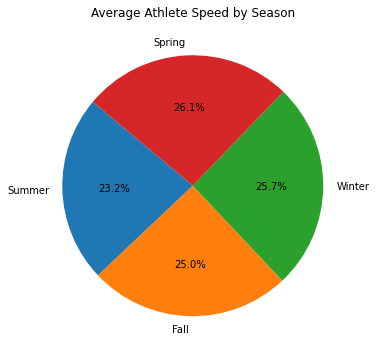

In [42]:
labels = result.index
values = result.values
plt.figure(figsize=(12, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Average Athlete Speed by Season')
plt.show()

# <span style='color:darkolivegreen'>6. Number of finishers Every Event ?</span>

Text(0, 0.5, 'Number Of finishers')

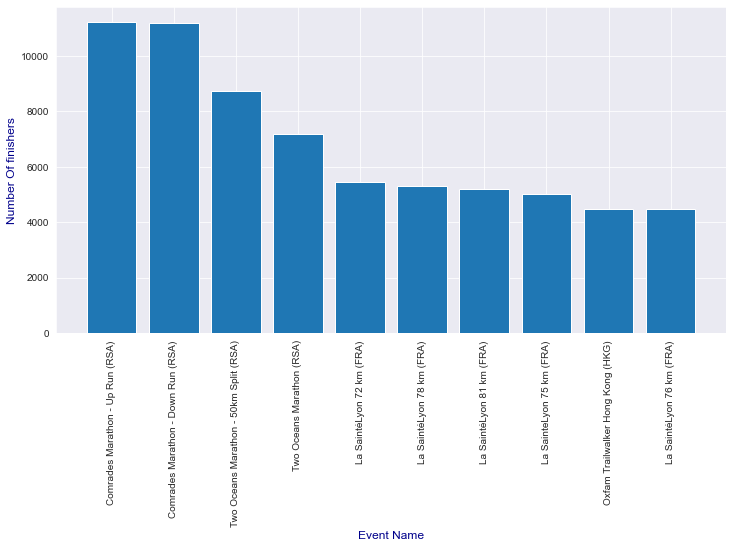

In [43]:
finsher_number=data.groupby('Event name')['Event number of finishers'].mean().to_frame('No of Finsher').sort_values('No of Finsher',ascending=False).reset_index()
f=finsher_number.head(10)
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt. bar(f['Event name'],f['No of Finsher'])
plt.xticks(rotation=90)
plt.xlabel('Event Name',color='darkblue',fontsize=12)
plt.ylabel('Number Of finishers',color='darkblue',fontsize=12)

# <span style='color:darkolivegreen'> 7. Num of participants in each events ?</span>

<AxesSubplot:title={'center':'No of Participants'}, xlabel='Event Name', ylabel='Participant number'>

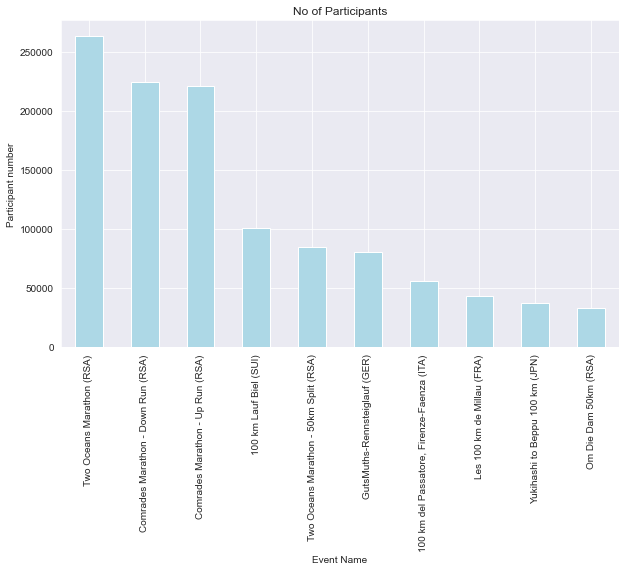

In [44]:
data['Event name'].value_counts().head(10).plot(kind='bar',title='No of Participants',xlabel='Event Name',ylabel='Participant number',figsize=(10,6),color='lightblue')

# <span style='color:darkolivegreen'> 8. Relationship between the length of the race and athlethe average speed ?</span>

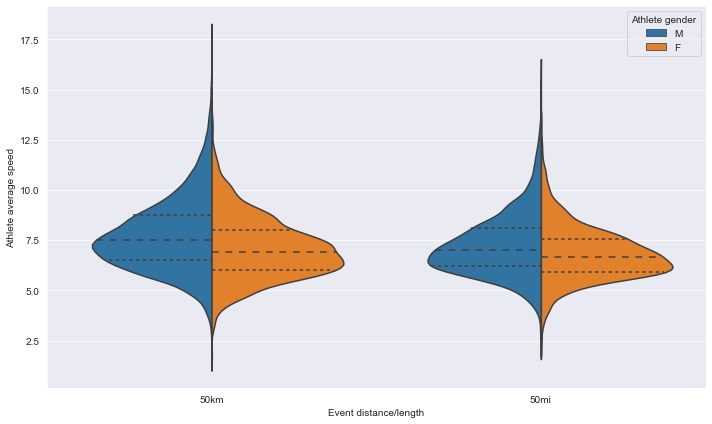

In [45]:
plt.figure(figsize=(10, 6))
sns.violinplot(data = my_data, x = 'Event distance/length', y='Athlete average speed', hue = 'Athlete gender', split = True, inner='quartz')
plt.tight_layout()


# <span style='color:darkolivegreen'> 9. Number of races in 50 km and 80 km ?</span>


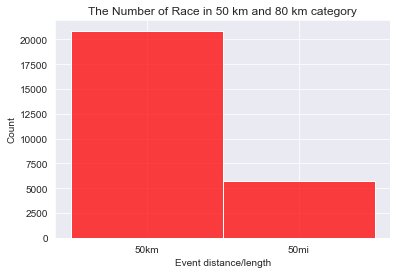

In [46]:
sns.histplot(my_data['Event distance/length'],color = 'red')
plt.title('The Number of Race in 50 km and 80 km category')
plt.show()

# <span style='color:darkolivegreen'> 10.Number of Race in 50 km and 80 km category by gender ?</span>


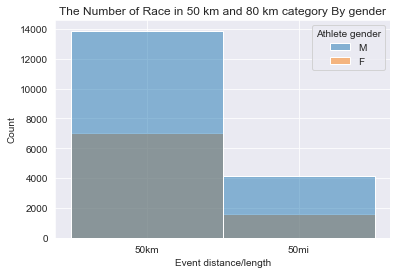

In [48]:
sns.histplot(my_data,  x= 'Event distance/length', hue = 'Athlete gender',palette = 'tab10')
plt.title('The Number of Race in 50 km and 80 km category By gender')
plt.show()